In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
test = pd.read_csv("test.csv")

In [0]:
train = pd.read_csv("train.csv")

In [9]:
print(test.shape)

(418, 11)


In [11]:
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
pt = train.pivot_table(index="Sex",values="Survived")


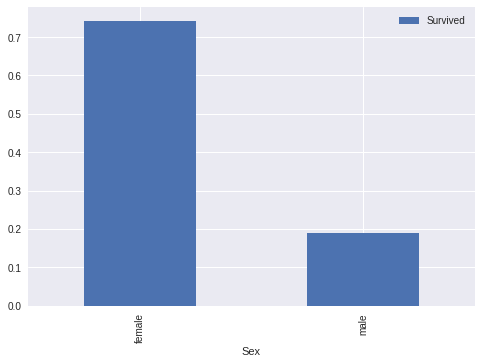

In [17]:
pt.plot.bar()

In [0]:
from matplotlib import pyplot as plt

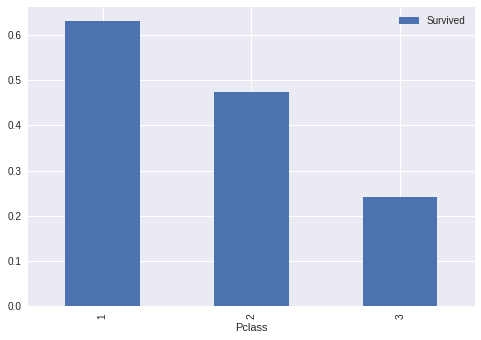

In [22]:
Pclass_Pivot = train.pivot_table(index="Pclass",values="Survived")
Pclass_Pivot
Pclass_Pivot.plot.bar()

In [24]:
Pclass_Pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


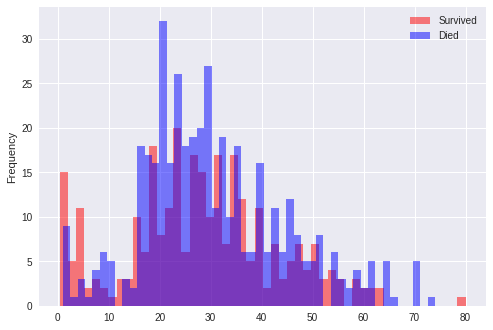

In [30]:
survived = train[train["Survived"]==1]
survived.head(10)
died = train[train["Survived"]==0]
survived["Age"].plot.hist(alpha=0.5,color="red",bins=50)
died["Age"].plot.hist(alpha=0.5,color="blue",bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [0]:
def process_age(df,cut_points,label_names):
  df["Age"] = df["Age"].fillna(-0.5)
  df["Age_Categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
  return df
cut_points=[-1,0,5,12,18,35,60,100]
label_names=["Missing","Infant","Child","Teenager","YoungAdult","Adult","Senior"]
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

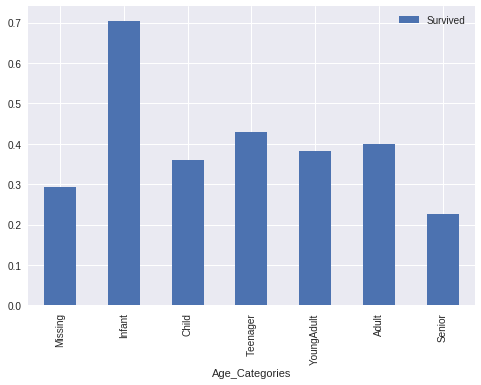

In [36]:
age_cat_pivot = train.pivot_table(index="Age_Categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [37]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [39]:
def create_dummies(df,column_name):
  dummies = pd.get_dummies(df[column_name],prefix=column_name)
  df = pd.concat([df,dummies],axis=1)
  return df

column_names = ["Pclass","Age_Categories","Sex"]
for x in column_names:
  train=create_dummies(train,x)
  test=create_dummies(test,x)

test.head(10)  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_3,Age_Categories_Missing,Age_Categories_Infant,Age_Categories_Child,Age_Categories_Teenager,Age_Categories_YoungAdult,Age_Categories_Adult,Age_Categories_Senior,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,0,0,0,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,0,0,0,0,1,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,0,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,0,0,0,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,0,0,0,0,1,0,0,1,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,...,1,0,0,0,1,0,0,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,...,1,0,0,0,0,1,0,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,...,0,0,0,0,0,1,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,...,1,0,0,0,1,0,0,0,1,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,...,1,0,0,0,0,1,0,0,0,1


In [0]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

columns = ['Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Age_Categories_Missing','Age_Categories_Infant','Age_Categories_Child', 
           'Age_Categories_Teenager',
       'Age_Categories_YoungAdult', 'Age_Categories_Adult',
       'Age_Categories_Senior']
lr.fit(train[columns],train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
holdout = test

from sklearn.model_selection import train_test_split

In [0]:
all_x = train[columns]
all_y = train["Survived"]

train_x, test_x,train_y,test_y = train_test_split(all_x,all_y,test_size=0.2,random_state=0)

In [62]:
test_x.shape


(179, 12)

In [70]:
train_x.head(10)

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Categories_Missing,Age_Categories_Infant,Age_Categories_Child,Age_Categories_Teenager,Age_Categories_YoungAdult,Age_Categories_Adult,Age_Categories_Senior
140,0,0,1,1,0,1,0,0,0,0,0,0
439,0,1,0,0,1,0,0,0,0,1,0,0
817,0,1,0,0,1,0,0,0,0,1,0,0
378,0,0,1,0,1,0,0,0,0,1,0,0
491,0,0,1,0,1,0,0,0,0,1,0,0
331,1,0,0,0,1,0,0,0,0,0,1,0
588,0,0,1,0,1,0,0,0,0,1,0,0
358,0,0,1,1,0,1,0,0,0,0,0,0
674,0,1,0,0,1,1,0,0,0,0,0,0
162,0,0,1,0,1,0,0,0,0,1,0,0


In [64]:
from sklearn.metrics import accuracy_score
lr.fit(train_x,train_y)
predictions = lr.predict(test_x)
acc_sc = accuracy_score(test_y,predictions)
acc_sc

0.8100558659217877

Confusion Matrix


In [65]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,96,14
Died,20,49


In [69]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(lr,all_x,all_y,cv=5)
np.mean(scores)

0.7890504495552324

In [71]:
lr.fit(all_x,all_y)
holdout_predictions=lr.predict(holdout[columns])
holdout_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId":holdout_ids,"Survived":holdout_predictions}
submission = pd.DataFrame(submission_df)

In [78]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [0]:
submission.to_csv("titanic_submission.csv",index=False)